In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df =pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


| Field         | Description                                              |
|---------------|----------------------------------------------------------|
| *Airline*     | Airline                                                  |
| *Flight*      | Unique flight id                                         |
| *Source_city* | Departure city                                           |
| *Departure_time*| Departure time                                         |
| *Stops*         | Number of stops along the way                          |
| *Arrival_time*| Arrival time                                             |
| *Destination_city*| Flight destination                                   |
| *Class*       | Seating class                                            |
| *Duration*    | Overall amount of time it takes to travel between cities in hours                                |
| *Days_left*   | The number of days between the booking date and the trip date                                             |
| *Price*    | Price |

Data Preprocessing

In [3]:
df['normalized_price'] = np.log(df['price'])

In [4]:
df['airline_idx'], uniques = pd.factorize(df['airline'])
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,normalized_price,airline_idx
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8.691651,0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8.691651,0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,8.692154,1
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,8.691986,2
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,8.691986,2


In [5]:
unique_cities = pd.unique(df[['source_city', 'destination_city']].values.ravel('K'))

# Create mapping dictionary
city_to_index = {city: idx for idx, city in enumerate(unique_cities)}

# Apply the mapping to both columns
df['source_city_idx'] = df['source_city'].map(city_to_index)
df['destination_city_idx'] = df['destination_city'].map(city_to_index)

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,normalized_price,airline_idx,source_city_idx,destination_city_idx
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8.691651,0,0,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8.691651,0,0,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,8.692154,1,0,1
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,8.691986,2,0,1
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,8.691986,2,0,1


In [6]:
#indexing departure time
departure_time_to_index = {
    "Late_Night": 5.0,
    "Early_Morning": 0.0,
    "Morning": 1.0,
    "Night": 4.0,
    "Evening": 3.0,
    "Afternoon": 2.0
}

def map_departure_time(departure_time):
    return departure_time_to_index.get(departure_time, None)

df['departure_time_idx'] = df['departure_time'].apply(map_departure_time)
df['arrival_time_idx'] = df['arrival_time'].apply(map_departure_time)

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,normalized_price,airline_idx,source_city_idx,destination_city_idx,departure_time_idx,arrival_time_idx
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8.691651,0,0,1,3.0,4.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8.691651,0,0,1,0.0,1.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,8.692154,1,0,1,0.0,0.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,8.691986,2,0,1,1.0,2.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,8.691986,2,0,1,1.0,1.0


In [8]:
df['class_idx'] = df['class'].apply(lambda x: 0.0 if x == 'Economy' else 1.0)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,normalized_price,airline_idx,source_city_idx,destination_city_idx,departure_time_idx,arrival_time_idx,class_idx
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8.691651,0,0,1,3.0,4.0,0.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8.691651,0,0,1,0.0,1.0,0.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,8.692154,1,0,1,0.0,0.0,0.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,8.691986,2,0,1,1.0,2.0,0.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,8.691986,2,0,1,1.0,1.0,0.0


In [7]:
stops_to_index = {
    "zero": 0.0,
    "one": 1.0,
    "two_or_more": 2.0,
}

# Function to map stops
def map_stops(stops):
    return stops_to_index.get(stops, None)

# Apply the function to create a new column
df['stops_idx'] = df['stops'].apply(map_stops)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,normalized_price,airline_idx,source_city_idx,destination_city_idx,departure_time_idx,arrival_time_idx,stops_idx
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8.691651,0,0,1,3.0,4.0,0.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8.691651,0,0,1,0.0,1.0,0.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,8.692154,1,0,1,0.0,0.0,0.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,8.691986,2,0,1,1.0,2.0,0.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,8.691986,2,0,1,1.0,1.0,0.0


Explaratory Data Analysis

In [8]:
total = df['airline'].value_counts().reset_index()
total.head()

,airline,count
0,Vistara,127859
1,Air_India,80892
2,Indigo,43120
3,GO_FIRST,23173
4,AirAsia,16098


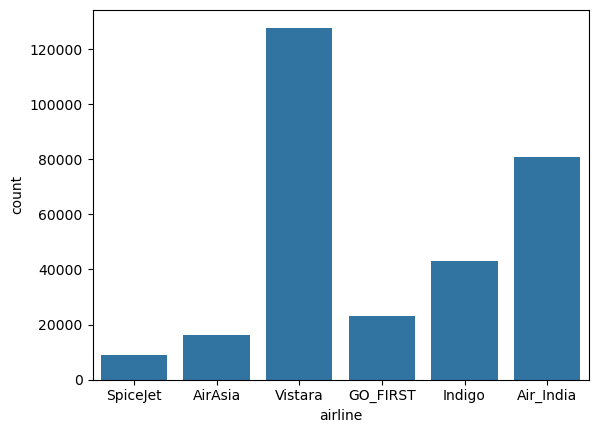

In [11]:
sns.countplot(df, x='airline', stat='count')
plt.show()

In [9]:
data1=df['source_city'].value_counts().reset_index()
data1.head()

,source_city,count
0,Delhi,61343
1,Mumbai,60896
2,Bangalore,52061
3,Kolkata,46347
4,Hyderabad,40806


In [10]:
data2=df['destination_city'].value_counts().reset_index()
data2.head()

,destination_city,count
0,Mumbai,59097
1,Delhi,57360
2,Bangalore,51068
3,Kolkata,49534
4,Hyderabad,42726


<Figure size 2000x1600 with 0 Axes>

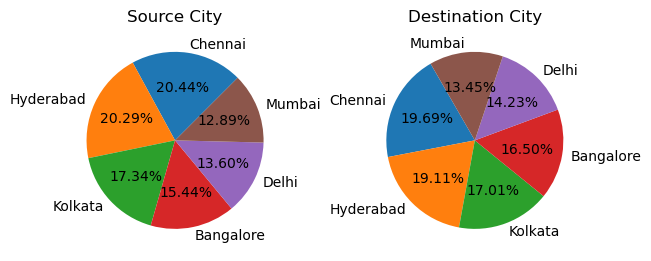

In [11]:

labels = ['Chennai','Hyderabad','Kolkata','Bangalore','Delhi','Mumbai']

plt.figure(figsize=(20,16))
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, constrained_layout = True)

ax[0].pie(data1['count'], labels=labels, startangle=45,  autopct='%.2f%%')
ax[0].set_title('Source City')
ax[1].pie(data2['count'], labels=labels, startangle=120, autopct='%.2f%%')
ax[1].set_title('Destination City')

plt.show()

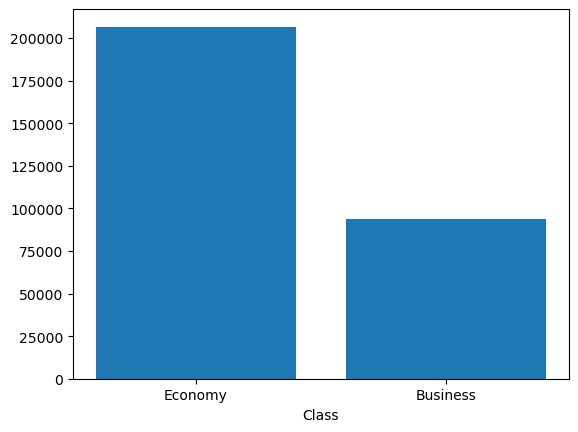

In [12]:
labels = ['Business, Economy']
flight_class=df['class'].value_counts().reset_index()
plt.bar(flight_class['class'], flight_class['count'])
plt.xlabel('Class')
plt.show()

In [13]:
tes = df.groupby(['days_left','class'])['price'].mean().reset_index()
tes.head(10)

,days_left,class,price
0,1,Business,65169.312030
1,1,Economy,14613.179410
2,2,Business,60455.848506
3,2,Economy,13980.828244
4,3,Business,60313.822331
5,3,Economy,13174.050992
6,4,Business,56120.287087
7,4,Economy,10901.386284
8,5,Business,56149.915397
9,5,Economy,10605.918315


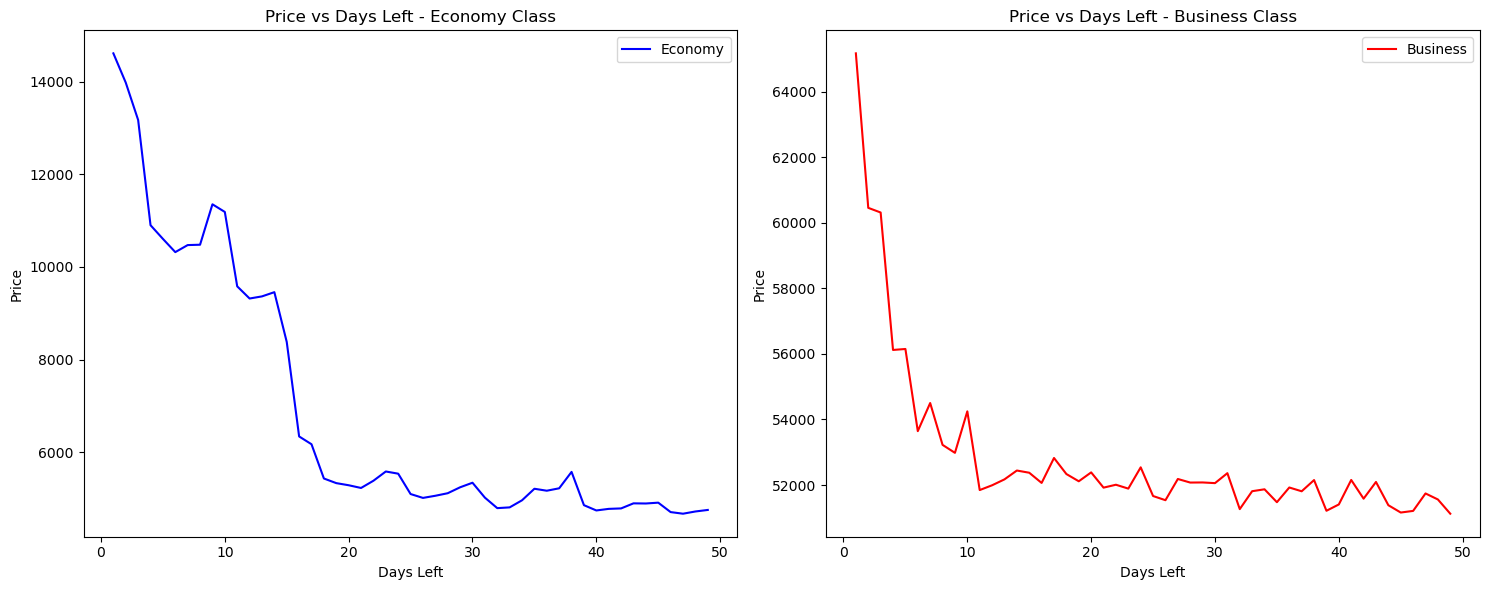

In [14]:
economy_data = tes[tes['class'] == 'Economy']
business_data = tes[tes['class'] == 'Business']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot for Economy class
ax1.plot(economy_data['days_left'], economy_data['price'], color='b', label='Economy')
ax1.set_xlabel('Days Left')
ax1.set_ylabel('Price')
ax1.set_title('Price vs Days Left - Economy Class')
ax1.legend()

# Plot for Business class
ax2.plot(business_data['days_left'], business_data['price'], color='r', label='Business')
ax2.set_xlabel('Days Left')
ax2.set_ylabel('Price')
ax2.set_title('Price vs Days Left - Business Class')
ax2.legend()

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In [15]:
tes2 = df.groupby(['stops','class'])['price'].mean().reset_index()
tes2.head(10)

,stops,class,price
0,one,Business,54687.377156
1,one,Economy,6812.857800
2,two_or_more,Business,70127.660203
3,two_or_more,Economy,9142.264279
4,zero,Business,27846.339052
5,zero,Economy,4012.624615


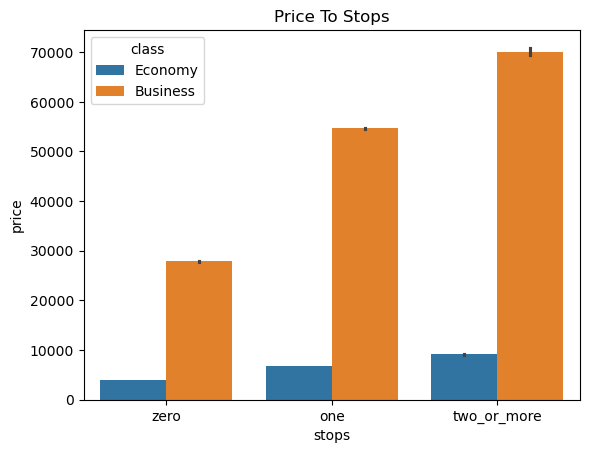

In [16]:
sns.barplot(df, x='stops',y='price',hue='class')
plt.title('Price To Stops')
plt.show()

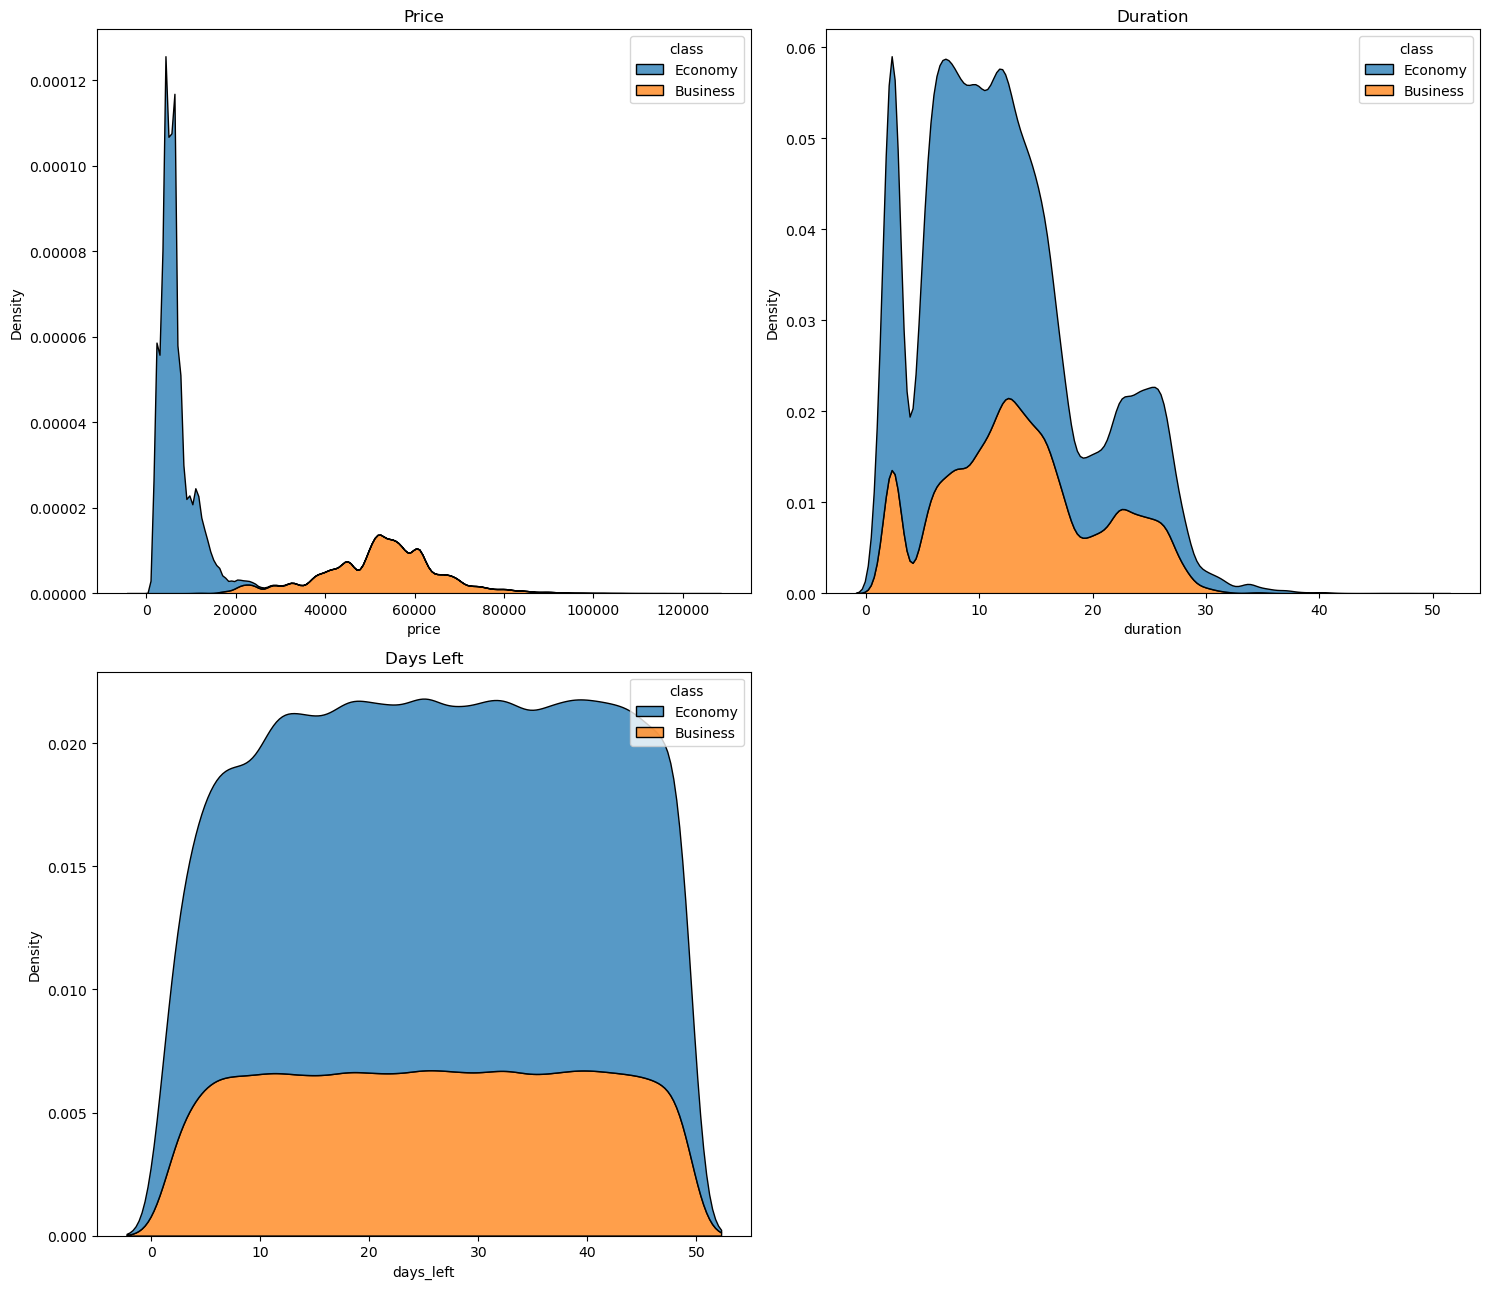

In [18]:
# Create a figure for the subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 13),sharex=False, sharey=False)

# Price distribution

# Price KDE plot
sns.kdeplot(df,x='price', hue='class', multiple='stack',ax=axes[0, 0])
axes[0, 0].set_title('Price')

# Duration KDE plot
sns.kdeplot(df,x='duration',hue='class', multiple='stack', ax=axes[0, 1])
axes[0,1 ].set_title('Duration')

# Days left KDE plot
sns.kdeplot(df,x='days_left',hue='class', multiple='stack',ax=axes[1,0 ])
axes[1, 0].set_title('Days Left')

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [19]:
#Create Dataframe for Indexed data
index_df = df[['airline_idx','source_city_idx','departure_time_idx','stops_idx','arrival_time_idx','destination_city_idx','class_idx','duration','days_left','normalized_price']]
index_df.head()

,airline_idx,source_city_idx,departure_time_idx,stops_idx,arrival_time_idx,destination_city_idx,class_idx,duration,days_left,normalized_price
0,0,0,3.0,0.0,4.0,1,0.0,2.17,1,8.691651
1,0,0,0.0,0.0,1.0,1,0.0,2.33,1,8.691651
2,1,0,0.0,0.0,0.0,1,0.0,2.17,1,8.692154
3,2,0,1.0,0.0,2.0,1,0.0,2.25,1,8.691986
4,2,0,1.0,0.0,1.0,1,0.0,2.33,1,8.691986


In [20]:
# Select only numeric columns for correlation analysis
numeric_data = index_df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Focus on the correlation with the diabetes progression (Y)
correlation_with_Y = correlation_matrix['normalized_price'].sort_values(ascending=False)

print(correlation_with_Y)


normalized_price        1.000000
class_idx               0.908626
duration                0.264296
stops_idx               0.171027
destination_city_idx    0.029463
source_city_idx         0.022607
departure_time_idx      0.006343
arrival_time_idx       -0.002196
airline_idx            -0.013367
days_left              -0.193535
Name: normalized_price, dtype: float64


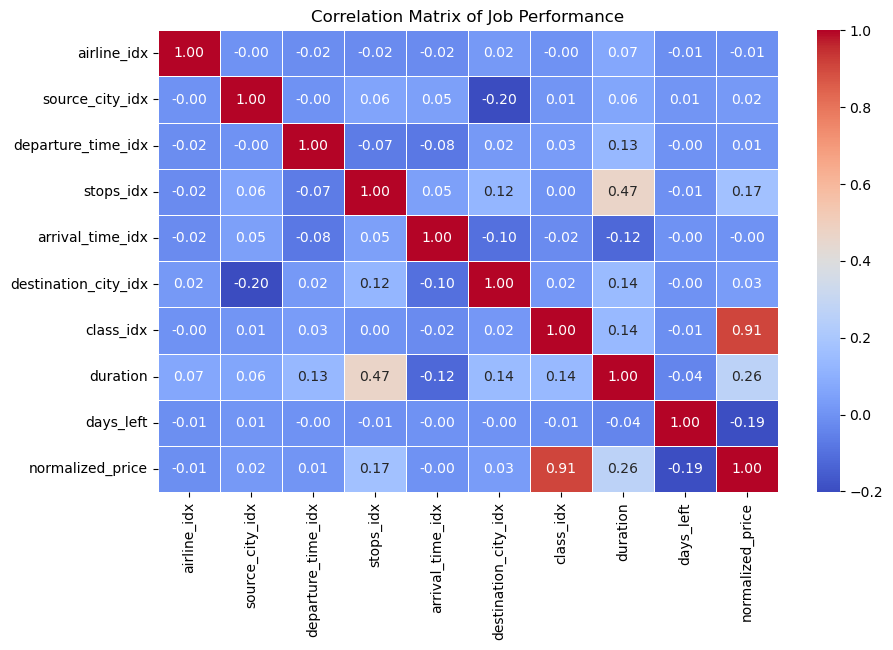

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Job Performance')
plt.show()

Machine Learning Model: Regression Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
X = index_df.drop(columns=['normalized_price']).values
y = index_df['normalized_price'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [25]:
models = ['Linear Regression','Gradient Boosting Regressor','MLP Regressor', 'Random Forest Regressor']
rmses =[]

In [26]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_lr= model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
rmses.append(rmse)
print(f"Root Mean Squared Error of Linear Regression Model: {rmse}")

Root Mean Squared Error of Linear Regression Model: 0.36482818215258167


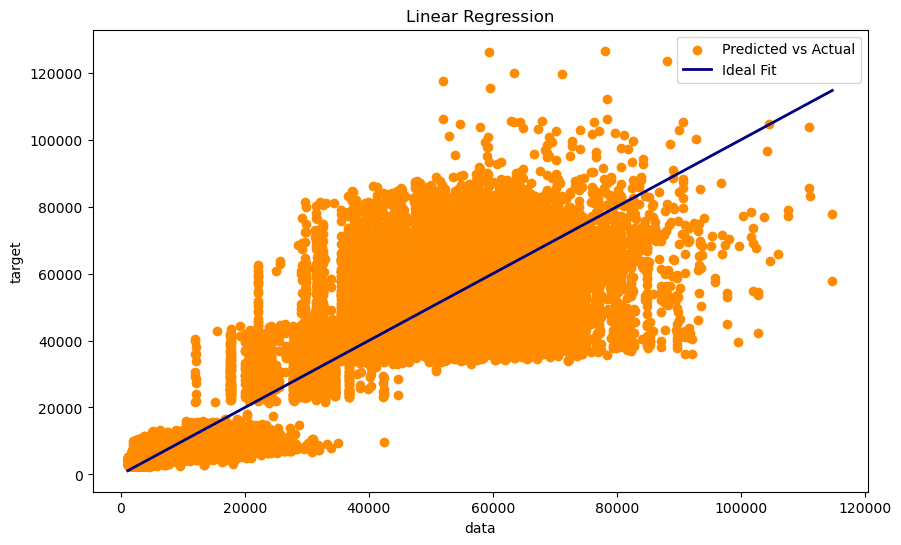

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_lr), color='darkorange', label='Predicted vs Actual')
plt.plot([np.min(np.exp(y_test)), np.max(np.exp(y_test))], [np.min(np.exp(y_test)), np.max(np.exp(y_test))], color='navy', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Linear Regression')
plt.legend()
plt.show()

GBT Regressor

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
gbt_model = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Train the model
gbt_model.fit(X_train, y_train)


y_pred_gbt = gbt_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gbt)
rmse = np.sqrt(mse)
rmses.append(rmse)
print(f"Root Mean Squared Error of GBT Model: {rmse}")

Root Mean Squared Error of GBT Model: 0.245313216411561


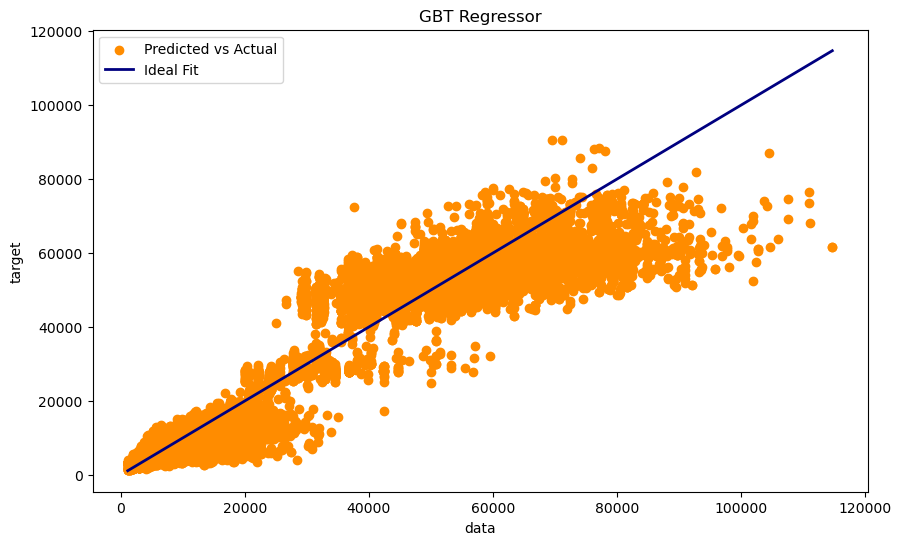

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_gbt), color='darkorange', label='Predicted vs Actual')
plt.plot([np.min(np.exp(y_test)), np.max(np.exp(y_test))], [np.min(np.exp(y_test)), np.max(np.exp(y_test))], color='navy', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.xlabel('data')
plt.ylabel('target')
plt.title('GBT Regressor')
plt.legend()
plt.show()

MLP Regressor

In [30]:
from sklearn.neural_network import MLPRegressor

# Create the model
mlp_model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=500, random_state=0)

# Train the model
mlp_model.fit(X_train, y_train)

y_pred_mlp=  mlp_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred_mlp)
rmse = np.sqrt(mse)
rmses.append(rmse)
print(f"Root Mean Squared Error of MLP Model: {rmse}")


Root Mean Squared Error of MLP Model: 0.30264922386968746


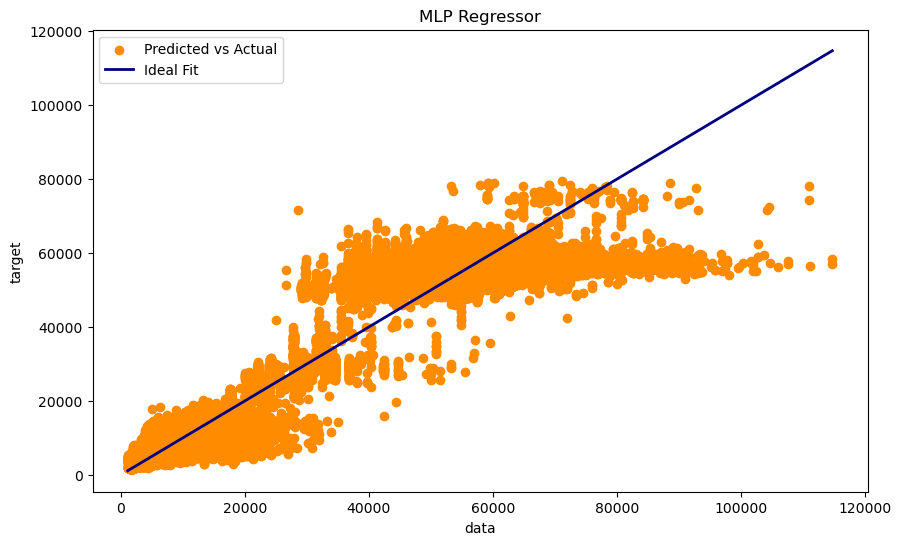

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_mlp), color='darkorange', label='Predicted vs Actual')
plt.plot([np.min(np.exp(y_test)), np.max(np.exp(y_test))], [np.min(np.exp(y_test)), np.max(np.exp(y_test))], color='navy', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.xlabel('data')
plt.ylabel('target')
plt.title('MLP Regressor')
plt.legend()
plt.show()

Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100,random_state=0)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
rmses.append(rmse)
print(f"Root Mean Squared Error of Random Forest Model: {rmse}")

Root Mean Squared Error of Random Forest Model: 0.13293430072030865


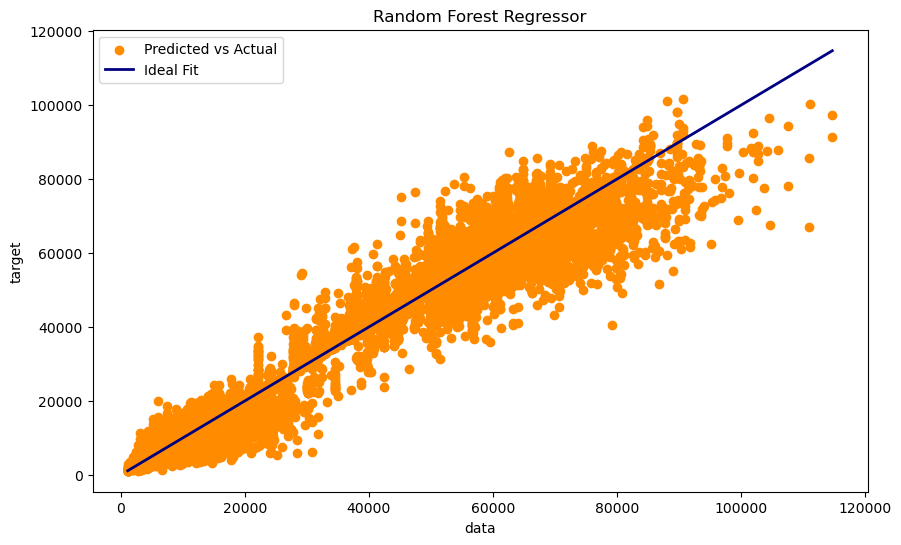

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_rf), color='darkorange', label='Predicted vs Actual')
plt.plot([np.min(np.exp(y_test)), np.max(np.exp(y_test))], [np.min(np.exp(y_test)), np.max(np.exp(y_test))], color='navy', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Random Forest Regressor')
plt.legend()
plt.show()

In [34]:
print(rmses)

[0.36482818215258167, 0.245313216411561, 0.30264922386968746, 0.13293430072030865]


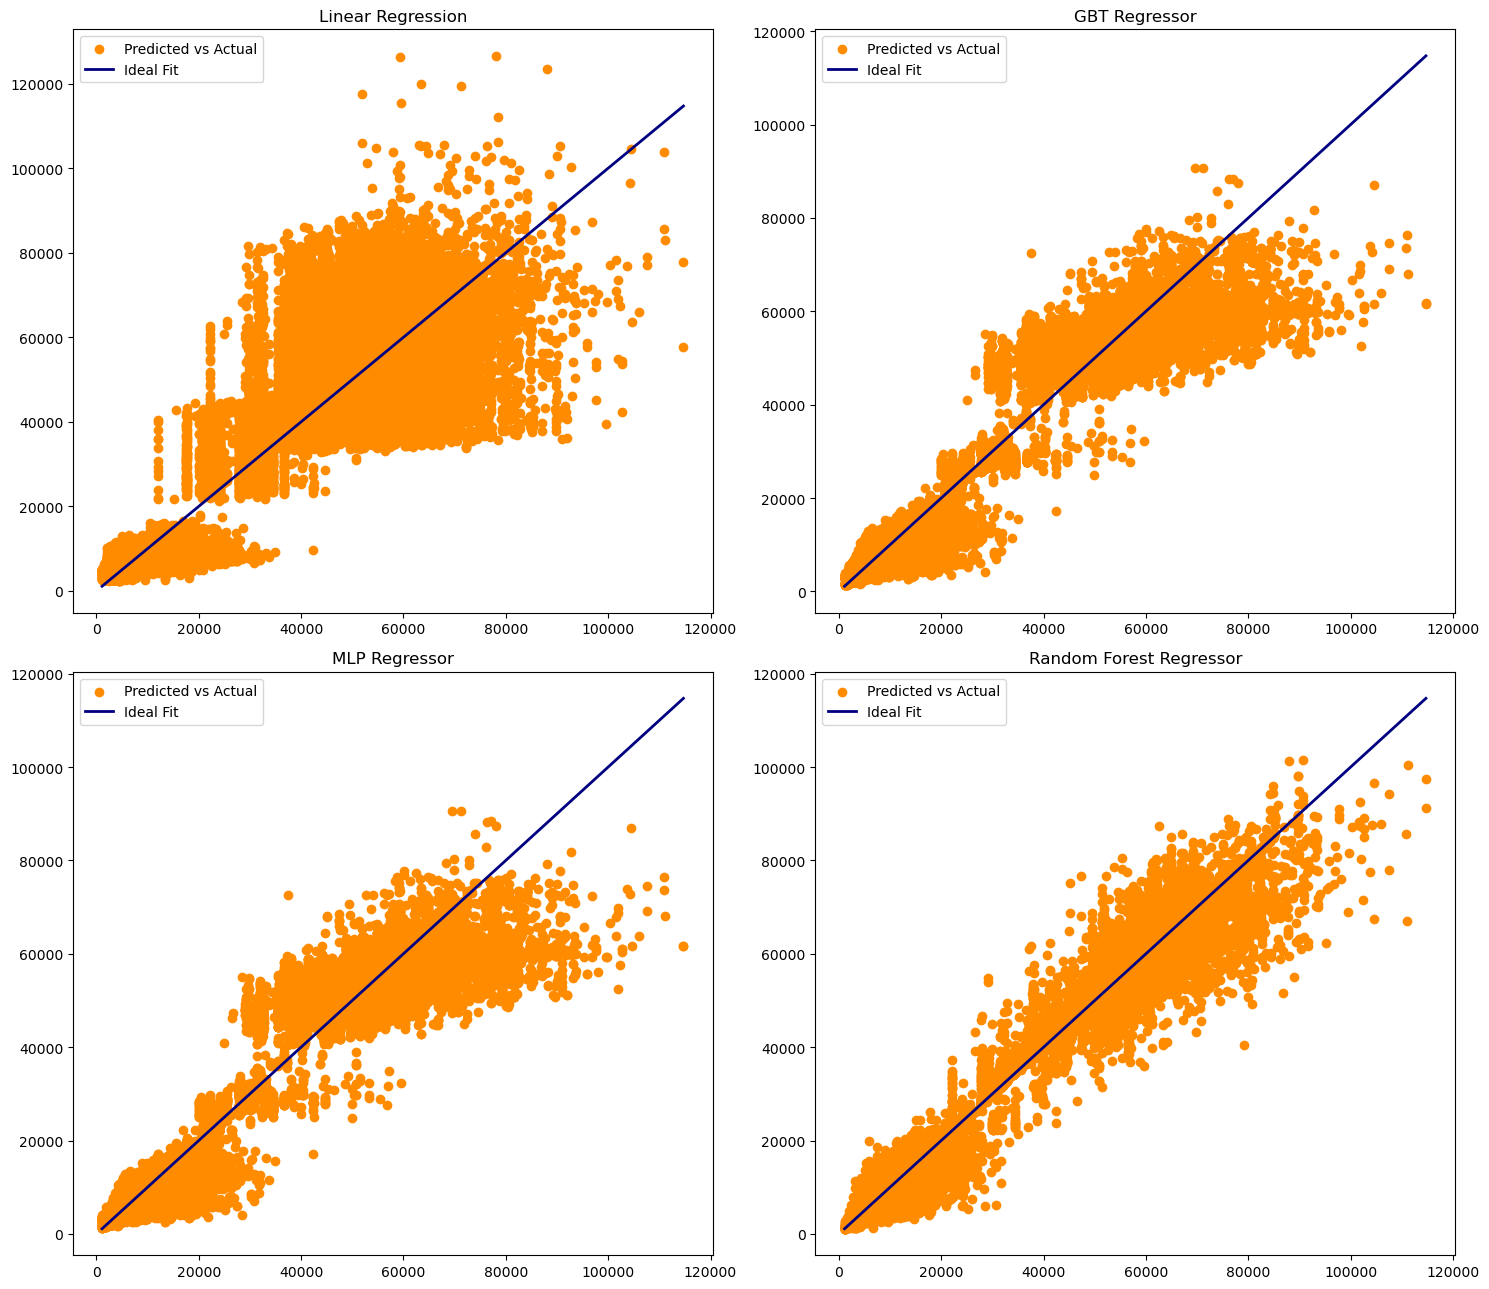

In [35]:
# Create a figure for the subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 13),sharex=False, sharey=False)

# Price distribution

# Price KDE plot
axes[0,0].scatter(np.exp(y_test), np.exp(y_pred_lr), color='darkorange', label='Predicted vs Actual')
axes[0,0].plot([np.min(np.exp(y_test)), np.max(np.exp(y_test))], [np.min(np.exp(y_test)), np.max(np.exp(y_test))], color='navy', lw=2, label='Ideal Fit')
axes[0,0].legend()
axes[0, 0].set_title('Linear Regression')

# Duration KDE plot
axes[0,1].scatter(np.exp(y_test), np.exp(y_pred_gbt), color='darkorange', label='Predicted vs Actual')
axes[0,1].plot([np.min(np.exp(y_test)), np.max(np.exp(y_test))], [np.min(np.exp(y_test)), np.max(np.exp(y_test))], color='navy', lw=2, label='Ideal Fit')
# axes[0,1].xlabel('Actual Values')
# axes[0,1].xlabel('data')
# axes[0,1].ylabel('target')
axes[0,1].legend()
axes[0, 1].set_title('GBT Regressor')

# Days left KDE plot
axes[1,0].scatter(np.exp(y_test), np.exp(y_pred_gbt), color='darkorange', label='Predicted vs Actual')
axes[1,0].plot([np.min(np.exp(y_test)), np.max(np.exp(y_test))], [np.min(np.exp(y_test)), np.max(np.exp(y_test))], color='navy', lw=2, label='Ideal Fit')
# axes[1,0].xlabel('Actual Values')
# axes[1,0].xlabel('data')
# axes[1,0].ylabel('target')
axes[1,0].legend()
axes[1,0].set_title('MLP Regressor')

axes[1,1].scatter(np.exp(y_test), np.exp(y_pred_rf), color='darkorange', label='Predicted vs Actual')
axes[1,1].plot([np.min(np.exp(y_test)), np.max(np.exp(y_test))], [np.min(np.exp(y_test)), np.max(np.exp(y_test))], color='navy', lw=2, label='Ideal Fit')
# axes[1,1].xlabel('Actual Values')
# axes[1,1].xlabel('data')
# axes[1,1].ylabel('target')
axes[1,1].legend()
axes[1,1].set_title('Random Forest Regressor')

plt.tight_layout()
plt.show()

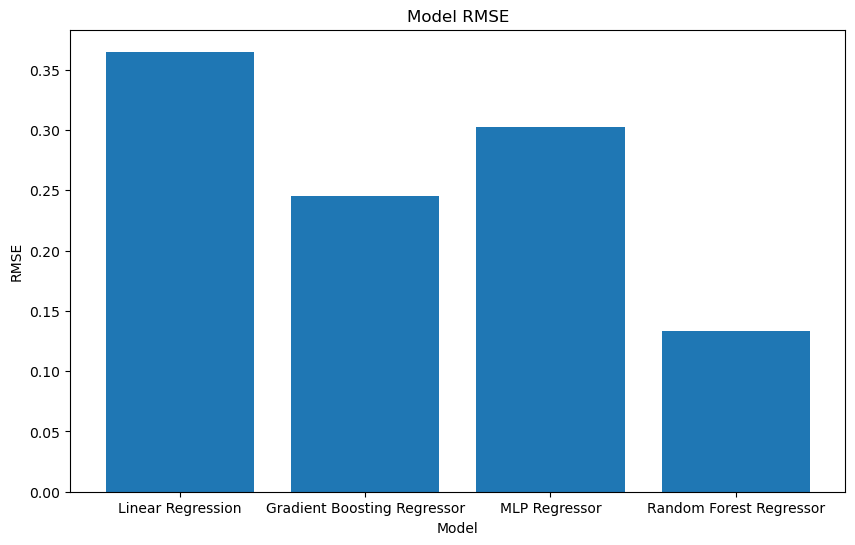

In [36]:
plt.figure(figsize=(10,6))
plt.bar(models, rmses)
plt.xlabel('Model')
plt.ylabel("RMSE")
plt.title('Model RMSE')
plt.show()

In [37]:
index_df.head()
temp_df = index_df.drop(columns=['normalized_price'])
temp_df.head()


,airline_idx,source_city_idx,departure_time_idx,stops_idx,arrival_time_idx,destination_city_idx,class_idx,duration,days_left
0,0,0,3.0,0.0,4.0,1,0.0,2.17,1
1,0,0,0.0,0.0,1.0,1,0.0,2.33,1
2,1,0,0.0,0.0,0.0,1,0.0,2.17,1
3,2,0,1.0,0.0,2.0,1,0.0,2.25,1
4,2,0,1.0,0.0,1.0,1,0.0,2.33,1


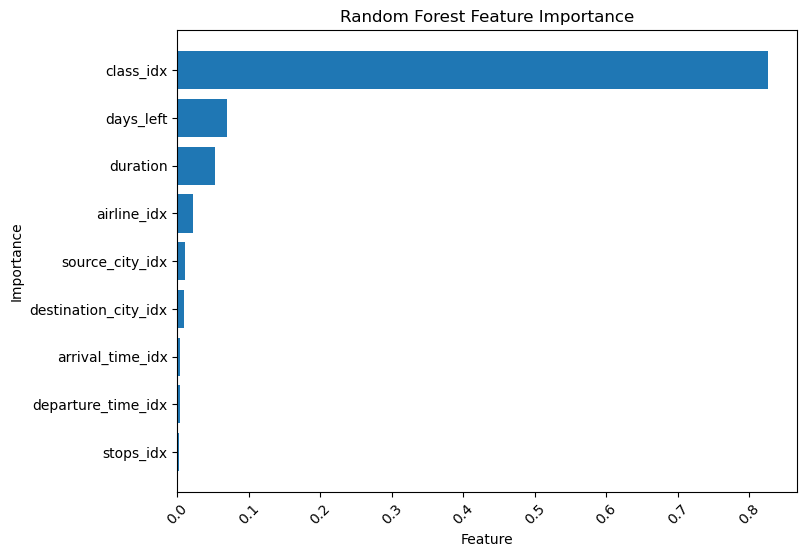

In [38]:
# Get feature importances and feature names
feature_importances = rf_model.feature_importances_
feature_names = temp_df.columns
sorted_idx = np.argsort(feature_importances)[::1]

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], align='center')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()
